In [105]:
import pandas as pd
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [60]:
df = pd.read_csv("World Energy Consumption.csv")
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [50]:
df.drop_duplicates(inplace = True)
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [56]:
def eliminar_columnas_con_muchos_nulos(df, umbral=0.5):
    total_filas = len(df)
    columnas_a_eliminar = [col for col in df.columns if df[col].isna().sum() / total_filas >= umbral]
    df_limpio = df.drop(columns=columnas_a_eliminar)
    return df_limpio

In [57]:
def eliminar_filas_con_muchos_nulos(df, umbral=0.5):
    umbral_nulos = int(df.shape[1] * umbral)
    return df[df.isna().sum(axis=1) < umbral_nulos]

In [58]:
df2 = eliminar_filas_con_muchos_nulos(df)
df2

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
123,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.000,0.00,0.000,NaN,255.319,NaN,NaN,NaN,NaN,0.000,0.00,0.000,0.000,0.297,0.006,0.000,NaN,0.57,0.47,NaN,-12.374,-0.835,302.595,0.524,NaN,NaN,8.187,0.16,NaN,NaN,34.043,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,127.644,2.495,0.0,NaN,0.12,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,0.10,17.544,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,8.187,0.16,NaN,NaN,0.0,0.0,0.0,34.043,NaN,NaN,0.00,0.0,NaN,NaN,0.000,0.0,NaN,0.000,0.0,NaN,24.050,5.914,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
124,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.000,0.00,0.000,NaN,118.644,NaN,NaN,NaN,NaN,0.000,0.00,2498.990,0.145,7.667,0.151,0.000,NaN,0.69,0.59,NaN,-21.130,-1.250,236.892,0.423,NaN,NaN,4.571,0.09,NaN,NaN,15.254,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-78.261,-1.952,27.543,0.542,0.0,NaN,0.07,NaN,NaN,NaN,25.395,0.50,NaN,84.746,NaN,NaN,NaN,NaN,25.395,0.50,NaN,84.746,NaN,0.10,14.493,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.571,0.09,NaN,NaN,0.0,0.0,0.0,15.254,NaN,NaN,0.00,0.0,NaN,NaN,0.000,0.0,NaN,0.000,0.0,NaN,29.967,4.664,NaN,NaN,NaN,25.395,0.50,NaN,

In [59]:
df3 = eliminar_columnas_con_muchos_nulos(df2)
df3

,country,year,iso_code,population,gdp,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
123,Afghanistan,2000,AFG,19542986.0,1.128379e+10,0.000,0.00,0.000,255.319,NaN,NaN,NaN,NaN,0.000,0.00,0.000,0.000,0.297,0.006,0.000,NaN,0.57,0.47,NaN,-12.374,-0.835,302.595,0.524,NaN,NaN,8.187,0.16,NaN,NaN,34.043,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,127.644,2.495,0.0,NaN,0.12,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,0.10,17.544,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,8.187,0.16,NaN,NaN,0.0,0.0,0.0,34.043,NaN,NaN,0.00,0.0,NaN,NaN,0.000,0.0,NaN,0.000,0.0,NaN,24.050,5.914,NaN,NaN,NaN,15.862,0.31,NaN,65.957,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
124,Afghanistan,2001,AFG,19688634.0,1.102127e+10,0.000,0.00,0.000,118.644,NaN,NaN,NaN,NaN,0.000,0.00,2498.990,0.145,7.667,0.151,0.000,NaN,0.69,0.59,NaN,-21.130,-1.250,236.892,0.423,NaN,NaN,4.571,0.09,NaN,NaN,15.254,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-78.261,-1.952,27.543,0.542,0.0,NaN,0.07,NaN,NaN,NaN,25.395,0.50,NaN,84.746,NaN,NaN,NaN,NaN,25.395,0.50,NaN,84.746,NaN,0.10,14.493,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4.571,0.09,NaN,NaN,0.0,0.0,0.0,15.254,NaN,NaN,0.00,0.0,NaN,NaN,0.000,0.0,NaN,0.000,0.0,NaN,29.967,4.664,NaN,NaN,NaN,25.395,0.50,NaN,84.746,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
125,Afghanistan,2002,AFG,21000258.0,1.880487e+10,0.000,0.00,0.000,144.928,NaN,NaN,NaN,NaN,0.000,0.00,-19.231,-0.029,5.806,0.122,0.000,NaN,0.79,0.69,NaN,-5.058,-0.23

In [64]:
def tratar_nulos_y_outliers(df, alpha=0.05):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        serie = df[col]
        # Test de normalidad (D’Agostino and Pearson)
        stat, p = normaltest(serie.dropna())
        es_normal = p > alpha

        # --- IMPUTACIÓN ---
        if serie.isna().sum() > 0:
            if es_normal:
                df[col] = serie.fillna(serie.mean())
            else:
                df[col] = serie.fillna(serie.median())

        # --- OUTLIERS ---
        if es_normal:
            # Método de 3 desviaciones estándar
            media = serie.mean()
            std = serie.std()
            mask_outlier = (serie < media - 3*std) | (serie > media + 3*std)
        else:
            # Método IQR
            q1 = serie.quantile(0.25)
            q3 = serie.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask_outlier = (serie < lower) | (serie > upper)

        # Opciones: eliminar, reemplazar o winsorizar. Aquí: imputar outliers con mediana
        if mask_outlier.any():
            if es_normal:
                df.loc[mask_outlier, col] = serie.mean()
            else:
                df.loc[mask_outlier, col] = serie.median()

    return df

In [65]:
df4 = tratar_nulos_y_outliers(df3)
df4

,country,year,iso_code,population,gdp,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
123,Afghanistan,2000,AFG,19542986.0,1.128379e+10,0.000,0.00,0.000,255.319,1.2115,0.221,3240.4845,91.1815,0.000,0.00,0.000,0.000,0.297,0.006,0.000,16.912,0.57,0.47,13.8735,2.544,-0.835,302.595,0.524,2.068,10.6645,8.187,0.16,25323.8055,747.0395,34.043,88.873,3.8465,3.964,159.692,0.0,0.0,5368.42,0.0000,0.000,127.644,2.495,0.0,19.041,0.12,2.603,0.371,45.0465,15.862,0.31,886.9995,65.957,5.684,4.078,2.018,88.253,15.862,0.31,2304.1255,65.957,11.127,0.10,0.000,0.0,23.347,0.0,0.0,107.3605,0.0,1.177,2.043,4.322,284.983,8.187,0.16,11687.742,0.1165,0.0,0.0,0.0,34.043,41.233,1.6905,0.00,0.0,5.495,0.026,0.000,0.0,42.821,0.000,0.0,0.258,24.050,5.914,4.3955,1.341,59.058,15.862,0.31,1315.022,65.957,6.962,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.016,0.0,0.0,0.128,0.0,0.005
124,Afghanistan,2001,AFG,19688634.0,1.102127e+10,0.000,0.00,0.000,118.644,1.2115,0.221,3240.4845,91.1815,0.000,0.00,0.954,0.145,7.667,0.151,0.000,16.912,0.69,0.59,13.8735,2.544,-1.250,236.892,0.423,2.068,10.6645,4.571,0.09,25323.8055,747.0395,15.254,88.873,3.8465,3.964,159.692,0.0,0.0,5368.42,2.6255,-1.952,27.543,0.542,0.0,19.041,0.07,2.603,0.371,45.0465,25.395,0.50,886.9995,84.746,5.684,4.078,2.018,88.253,25.395,0.50,2304.1255,84.746,11.127,0.10,0.000,0.0,23.347,0.0,0.0,107.3605,0.0,1.177,2.043,4.322,284.983,4.571,0.09,11687.742,0.1165,0.0,0.0,0.0,15.254,41.233,1.6905,0.00,0.0,5.495,0.026,0.000,0.0,42.821,0.000,0.0,0.258,2

In [67]:
df.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

In [73]:
# Seleccionar columnas numéricas
num_cols = df4.select_dtypes(include=['number']).columns

# Inicializar el escalador
scaler = StandardScaler()

# Escalar solo las columnas numéricas y devolver un DataFrame
df5 = df4.copy()
df5[num_cols] = scaler.fit_transform(df4[num_cols])

# Convertir de nuevo a DataFrame para conservar nombres de columnas si se desea
df_final = pd.DataFrame(df5, columns=df5.columns)
df_final.head()

,country,year,iso_code,population,gdp,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
123,Afghanistan,0.062667,AFG,-0.273569,-1.017140,-0.512014,-0.435819,-0.741183,-1.225855,0.03421,-0.131132,-0.293449,-0.277891,-0.663823,-0.4859,-0.134722,-0.064172,-0.572684,-0.389350,-0.977188,-0.105139,-0.900352,-0.718023,0.049585,-0.007311,-0.469095,-1.290106,-1.555164,-0.023248,-0.110807,-1.206330,-0.738250,-0.0362,-0.158944,-1.144899,0.146227,0.000839,-0.151825,-0.180133,-0.891947,-0.680436,-0.123735,-0.417000,-0.298204,-0.606461,-0.579691,-1.116619,-0.011498,-0.742030,0.009394,-0.114872,-0.198572,-0.834540,-0.623091,-0.230088,2.194534,0.01143,-0.017197,-0.139402,-0.207772,-0.779357,-0.633019,-0.191583,1.087221,-0.146227,-0.005121,-0.129461,-0.173923,-0.238055,-0.294111,-0.386663,-0.404242,-0.440327,-0.362986,-0.022111,-0.10041,-0.25415,-0.984519,-0.708560,-0.119272,-0.019849,-0.084868,-0.667348,-0.487569,4.538413,-0.02107,-0.333112,-0.476839,0.0,-0.04897,-0.251419,-0.5617,0.0,-0.313853,-0.748802,0.0,-0.21371,-1.349864,-0.727257,-0.008846,-0.124837,-0.210271,-0.869521,-0.635025,-0.214704,1.472295,-0.142603,-0.235418,-0.260258,-0.256457,-0.28754,-0.279749,-0.263409,-0.250282,-0.254392,-0.303176,-0.282575,-0.303321,-0.283274,-0.322244,-0.29668
124,Afghanistan,0.130032,AFG,-0.268816,-1.018398,-0.512014,-0.435819,-0.741183,-2.174571,0.03421,-0.131132,-0.293449,-0.277891,-0.663823,-0.4859,0.015062,0.029918,-0.570289,-0.388901,-0.977188,-0.105139,-0.898488,-0.717051,0.0495

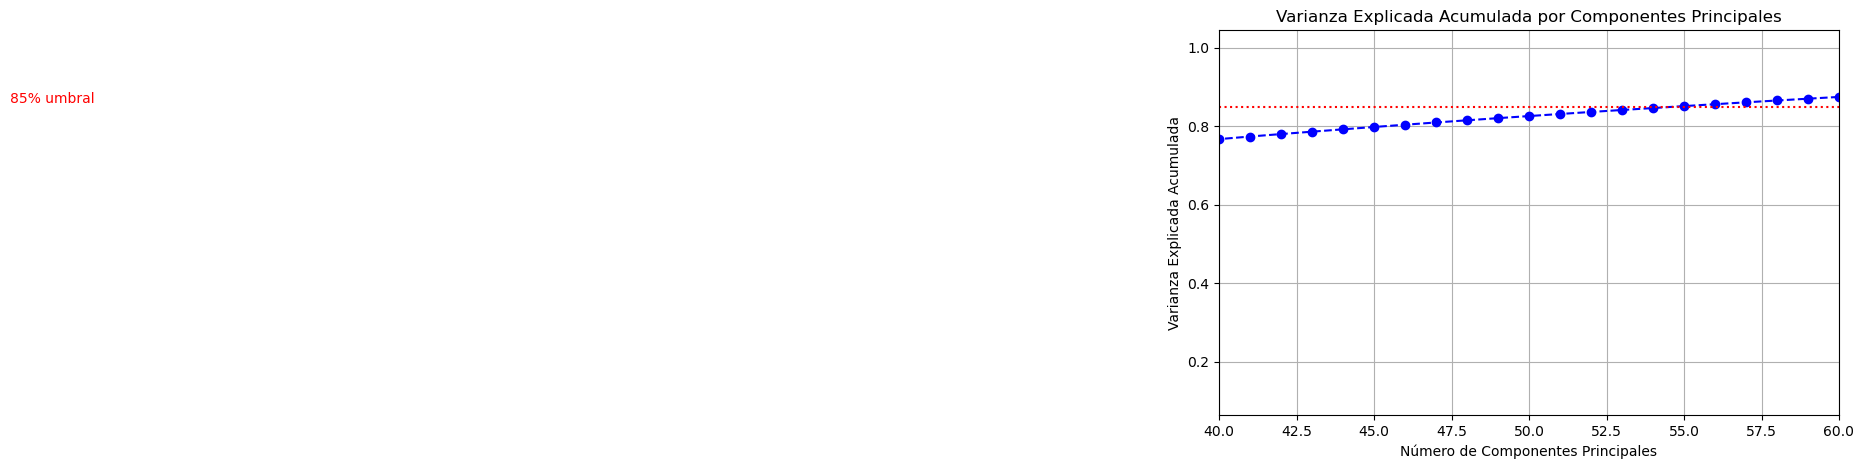

In [94]:
# Seleccionar solo columnas numéricas
num_cols = df_final.select_dtypes(include=['number']).columns
df_num = df_final[num_cols]

# Crear PCA sin limitar el número de componentes (usará todos)
pca = PCA()

# Ajustar PCA a tus datos
pca.fit(df_num)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle=':')  # Línea de referencia al 85%
plt.text(1, 0.86, '85% umbral', color = 'r')
# Limitar ejes
plt.xlim(40, 60)
plt.show()

In [98]:
# Seleccionar solo columnas numéricas
num_cols = df_final.select_dtypes(include=['number']).columns
df_num = df_final[num_cols]

# aplica transformacion PCA
pca = PCA(n_components=55) # define el transformador PCA con n_componentes
fit_pca = pca.fit(df_num)
df_post_pca = fit_pca.transform(df_num) # ajusta el transformador PCA con los datos

In [97]:
fit_pca.explained_variance_ratio_

array([0.1078018 , 0.07359117, 0.06277802, 0.04003655, 0.03429929,
       0.03052611, 0.02854954, 0.02277741, 0.0220321 , 0.02162145,
       0.01977723, 0.01761285, 0.01632151, 0.01484548, 0.01461013,
       0.01387258, 0.0134715 , 0.01307822, 0.01212728, 0.01198633,
       0.0117597 , 0.01138493, 0.01090188, 0.01057337, 0.01004323,
       0.00960606, 0.00938314, 0.00905828, 0.00870691, 0.00864989,
       0.0083521 , 0.00824562, 0.00802985, 0.00793387, 0.00769311,
       0.0073074 , 0.00725686, 0.00689273, 0.00682829, 0.00669001,
       0.00658692, 0.00629514, 0.00609955, 0.00598033, 0.00594778,
       0.00582868, 0.0056777 , 0.0055465 , 0.00548938, 0.00532076,
       0.00527672, 0.00519622, 0.00500602, 0.00496374, 0.00494794])

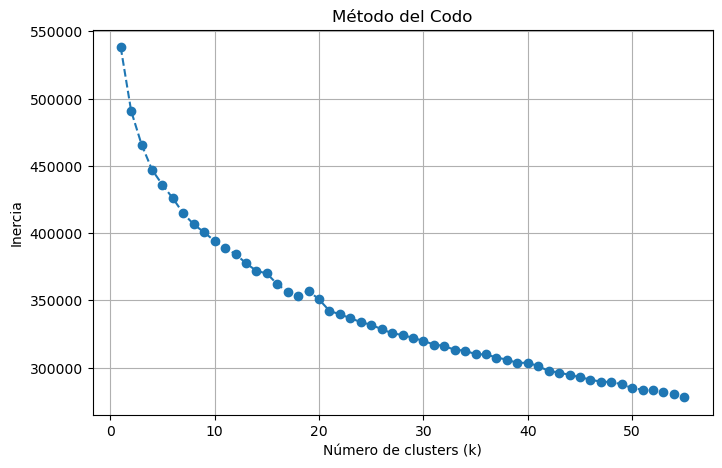

In [109]:
inertias = []
k_range = range(1, 56)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()